# Importing the required libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import dabl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Importing the dataset

In [14]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Scaling down our data

## Feature Scaling

In [15]:
scaler = StandardScaler()
scaler.fit(df.drop('Outcome',axis=1))
scaled_features = scaler.transform(df.drop('Outcome',axis=1))
scaler_trans = pd.DataFrame(scaled_features,columns=df.columns[:-1])
scaler_trans.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


# Finding out right model


Target looks like classification
Linear Discriminant Analysis training set score: 0.737


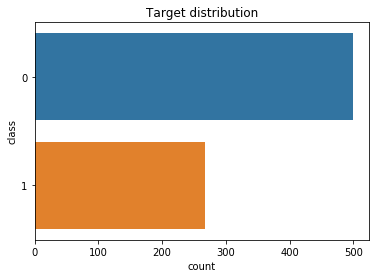

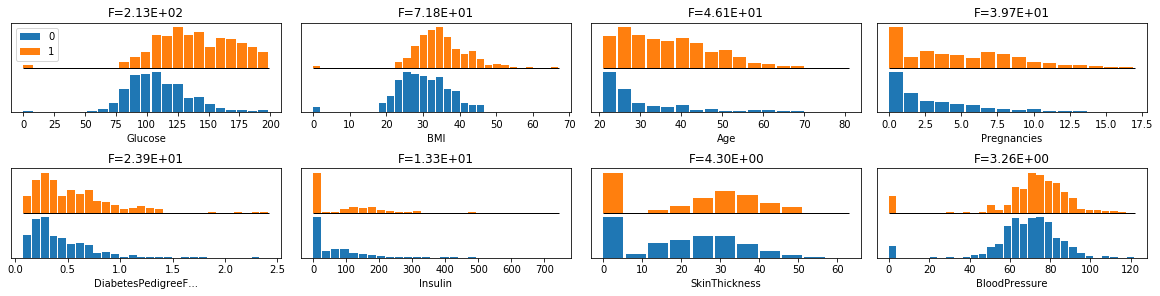

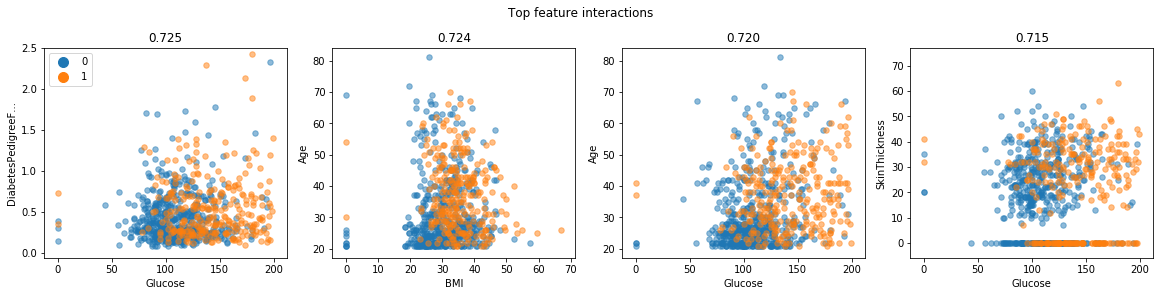

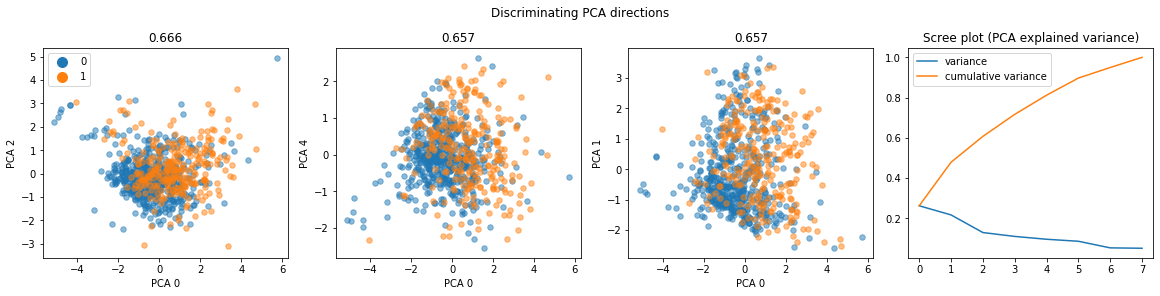

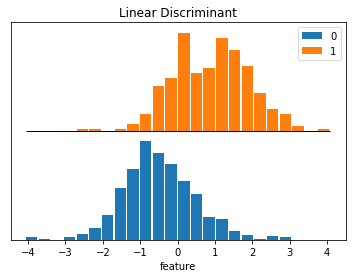

In [16]:
dabl.plot(df, target_col="Outcome")

In [17]:
ec = dabl.SimpleClassifier().fit(df, target_col="Outcome") 

Running DummyClassifier(strategy='prior')
accuracy: 0.651 average_precision: 0.349 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.394
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.651 average_precision: 0.349 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.394

Running GaussianNB()
accuracy: 0.652 average_precision: 0.571 roc_auc: 0.745 recall_macro: 0.517 f1_macro: 0.447
=== new best GaussianNB() (using recall_macro):
accuracy: 0.652 average_precision: 0.571 roc_auc: 0.745 recall_macro: 0.517 f1_macro: 0.447

Running MultinomialNB()
accuracy: 0.671 average_precision: 0.499 roc_auc: 0.663 recall_macro: 0.583 f1_macro: 0.578
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.671 average_precision: 0.499 roc_auc: 0.663 recall_macro: 0.583 f1_macro: 0.578

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.707 average_precision: 0.502 roc_auc: 0.699 recall_macro: 0.699 f1_macro: 0.688
=== new best DecisionTreeClas

Logistic Regression is the best one

# Splitting the data

In [25]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


# Fitting Classifier to training set

In [27]:
classifier = LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000)
classifier.fit(X_train, y_train)


LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Predicting the Test set results

In [28]:
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix


In [29]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[34 11]
 [ 9 23]]


In [30]:
y_pred,y_test

(array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0]))

In [31]:
accuracy_score(y_train, classifier.predict(X_train)),
accuracy_score(y_test, classifier.predict(X_test))

(0.7525325615050651, 0.7402597402597403)